### VGGNet

VGGNet[1] 诞生于 2014 年，其最大的改进是在网络的深度上，相较于 AlexNet 的 8 层网络，VGGNet 则是增加到了 16 层（VGGNet16）和 19 层（VGGNet19），更深的网络意味着更强的表达能力，同时得益于其规整的网络结构，所以十分适合硬件加速。VGGNet 的另一个显著特点是仅使用了单一尺寸的 $3\times3$ 卷积核，在之前介绍卷积的感受野时也提到过，使用小卷积核堆积的效果要优于大卷积核，在减少参数的同时，提高了识别准确率。

上面提到了 VGGNet16 和 VGGNet19 两个网络，这两者只是网络的深度不同，前者 16 层（13 层卷积、3 层全连接），后者 19 层（16 层卷积、3 层全连接），本质上并没有什么区别。本节使用 VGGNet16 来训练 CIFAR-10 数据集，并在结构上做一些调整。

**注** CBAPD 即 **C**onvolutional、**B**atch Normalization、**A**ctivation、**P**ooling、**D**ropout

为了简化网络结构描述的长度，下面对于没使用到的部分就不写出来了。此外，由于 VGGNet 网络的规整性，可以把各层按块分开，这样有助于区分且可以发现网络结构的规律性：

+ 第一部分：
  + 第一层：卷积层
   + C：使用 64 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化 Batch Normalization（
   + A：使用 ReLu 激活函数
  + 第二层：卷积层
   + C：使用 64 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化 Batch Normalization
   + A：使用 ReLu 激活函数
   + P：使用 $2\times2$ 的池化核，采用最大值池化，步长为 2，使用全 0 填充（same）
   + D：使用概率为 0.2 的 Dropout
+ 第二部分：
  + 第三层：卷积层
   + C：使用 128 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化 Batch Normalization（
   + A：使用 ReLu 激活函数
  + 第四层：卷积层
   + C：使用 128 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化 Batch Normalization
   + A：使用 ReLu 激活函数
   + P：使用 $2\times2$ 的池化核，采用最大值池化，步长为 2，使用全 0 填充（same）
   + D：使用概率为 0.2 的 Dropout
+ 第三部分：
  + 第五层：卷积层
   + C：使用 256 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化
   + A：使用 ReLu 激活函数
  + 第六层：卷积层
   + C：使用 256 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化
   + A：使用 ReLu 激活函数
  + 第七层：卷积层
   + C：使用 256 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化
   + A：使用 ReLu 激活函数
   + P：使用 $2\times2$ 的池化核，采用最大值池化，步长为 2，使用全 0 填充（same）
   + D：使用概率为 0.2 的 Dropout
+ 第四部分：
  + 第八层：卷积层
   + C：使用 512 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化
   + A：使用 ReLu 激活函数
  + 第九层：卷积层
   + C：使用 512 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化
   + A：使用 ReLu 激活函数
  + 第十层：卷积层
   + C：使用 512 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化
   + A：使用 ReLu 激活函数
   + P：使用 $2\times2$ 的池化核，采用最大值池化，步长为 2，使用全 0 填充（same）
   + D：使用概率为 0.2 的 Dropout
+ 第五部分：
  + 第十一层：卷积层
   + C：使用 512 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化
   + A：使用 ReLu 激活函数
  + 第十二层：卷积层
   + C：使用 512 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化
   + A：使用 ReLu 激活函数
  + 第十三层：卷积层
   + C：使用 512 个 $3\times3$ 的卷积核，步长为 1，使用全 0 填充（same）
   + B：使用批标准化
   + A：使用 ReLu 激活函数
   + P：使用 $2\times2$ 的池化核，采用最大值池化，步长为 2，使用全 0 填充（same）
   + D：使用概率为 0.2 的 Dropout
+ 第六部分：
  + Flatten 拉伸卷积层传来的输入特征 
  + 第十四层：全连接层
   + 512 个神经元
   + 使用 ReLu 激活函数 
   + 使用值为 0.2 的 Dropout
  + 第十五层：全连接层
   + 512 个神经元
   + 使用 ReLu 激活函数 
   + 使用值为 0.2 的 Dropout
  + 第十六层：全连接层（输出层）
   + 10 个神经元
   + 使用 softmax 激活函数


+ [1] Simonyan K , Zisserman A . Very Deep Convolutional Networks for Large-Scale Image Recognition[J]. arXiv, 2014.

In [1]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

实现 VGGNet16 网络模型

In [2]:
class VGGNet16(Model):
    def __init__(self):
        super(VGGNet16, self).__init__()
        # 第一部分 filters=64 CBA CBAPD
        self.c1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same')  
        self.b1 = BatchNormalization()  
        self.a1 = Activation('relu')  
        self.c2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', )
        self.b2 = BatchNormalization()   
        self.a2 = Activation('relu')  
        self.p2 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d2 = Dropout(0.2)  # dropout层

        # 第二部分 filters=128 CBA CBAPD
        self.c3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b3 = BatchNormalization()  
        self.a3 = Activation('relu') 
        self.c4 = Conv2D(filters=128, kernel_size=(3, 3), padding='same')
        self.b4 = BatchNormalization()  
        self.a4 = Activation('relu') 
        self.p4 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d4 = Dropout(0.2)  

        # 第三部分 filters=256 CBA CBA CBAPD
        self.c5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b5 = BatchNormalization() 
        self.a5 = Activation('relu')   
        self.c6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b6 = BatchNormalization()  
        self.a6 = Activation('relu')  
        self.c7 = Conv2D(filters=256, kernel_size=(3, 3), padding='same')
        self.b7 = BatchNormalization()
        self.a7 = Activation('relu')
        self.p7 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d7 = Dropout(0.2)

        # 第四部分 filters=512 CBA CBA CBAPD
        self.c8 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b8 = BatchNormalization()   
        self.a8 = Activation('relu')   
        self.c9 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b9 = BatchNormalization()   
        self.a9 = Activation('relu')   
        self.c10 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b10 = BatchNormalization()
        self.a10 = Activation('relu')
        self.p10 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d10 = Dropout(0.2)

        # 第五部分 filters=512 CBA CBA CBAPD
        self.c11 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b11 = BatchNormalization()   
        self.a11 = Activation('relu')   
        self.c12 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b12 = BatchNormalization()   
        self.a12 = Activation('relu')   
        self.c13 = Conv2D(filters=512, kernel_size=(3, 3), padding='same')
        self.b13 = BatchNormalization()
        self.a13 = Activation('relu')
        self.p13 = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')
        self.d13 = Dropout(0.2)

        # 第六部分 
        self.flatten = Flatten()
        self.f14 = Dense(512, activation='relu')
        self.d14 = Dropout(0.2)
        self.f15 = Dense(512, activation='relu')
        self.d15 = Dropout(0.2)
        self.f16 = Dense(10, activation='softmax')

    def call(self, x):
        # 第一部分 
        x = self.c1(x)
        x = self.b1(x)
        x = self.a1(x)
        x = self.c2(x)
        x = self.b2(x)
        x = self.a2(x)
        x = self.p2(x)
        x = self.d2(x)

        # 第二部分 
        x = self.c3(x)
        x = self.b3(x)
        x = self.a3(x)
        x = self.c4(x)
        x = self.b4(x)
        x = self.a4(x)
        x = self.p4(x)
        x = self.d4(x)

        # 第三部分 
        x = self.c5(x)
        x = self.b5(x)
        x = self.a5(x)
        x = self.c6(x)
        x = self.b6(x)
        x = self.a6(x)
        x = self.c7(x)
        x = self.b7(x)
        x = self.a7(x)
        x = self.p7(x)
        x = self.d7(x)

        # 第四部分 
        x = self.c8(x)
        x = self.b8(x)
        x = self.a8(x)
        x = self.c9(x)
        x = self.b9(x)
        x = self.a9(x)
        x = self.c10(x)
        x = self.b10(x)
        x = self.a10(x)
        x = self.p10(x)
        x = self.d10(x)

        # 第五部分 
        x = self.c11(x)
        x = self.b11(x)
        x = self.a11(x)
        x = self.c12(x)
        x = self.b12(x)
        x = self.a12(x)
        x = self.c13(x)
        x = self.b13(x)
        x = self.a13(x)
        x = self.p13(x)
        x = self.d13(x)

        # 第六部分 
        x = self.flatten(x)
        x = self.f14(x)
        x = self.d14(x)
        x = self.f15(x)
        x = self.d15(x)
        y = self.f16(x)
        return y

训练步骤依然是之前扩展的“六步法”

In [3]:
# 导入数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# VGGNet16
model = VGGNet16()

In [5]:
# 配置模型参数
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

In [6]:
# 设置断点续训
checkpoint_save_path = './checkpoint/VGGNet16.ckpt'
if os.path.exists(checkpoint_save_path + '.index'):
    model.load_weights(checkpoint_save_path)

In [7]:
# 设置保存最优模型参数回调
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                save_best_only=True,
                                                save_weights_only=True)

In [8]:
# 训练模型
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_test, y_test),
                    validation_freq=1,
                    callbacks=[cp_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2665s 53ms/sample - loss: 1.9168 - sparse_categorical_accuracy: 0.2302 - val_loss: 2.1111 - val_sparse_categorical_accuracy: 0.2533
Epoch 2/5
50000/50000 [==============================] - 2671s 53ms/sample - loss: 1.5116 - sparse_categorical_accuracy: 0.4093 - val_loss: 1.5257 - val_sparse_categorical_accuracy: 0.4356
Epoch 3/5
50000/50000 [==============================] - 2622s 52ms/sample - loss: 1.2042 - sparse_categorical_accuracy: 0.5694 - val_loss: 1.1686 - val_sparse_categorical_accuracy: 0.6056
Epoch 4/5
50000/50000 [==============================] - 2603s 52ms/sample - loss: 0.9990 - sparse_categorical_accuracy: 0.6578 - val_loss: 0.9305 - val_sparse_categorical_accuracy: 0.6821
Epoch 5/5
50000/50000 [==============================] - 2573s 51ms/sample - loss: 0.8706 - sparse_categorical_accuracy: 0.7077 - val_loss: 0.8985 - val_sparse_categorical_accuracy: 0.6892


In [9]:
# 打印网络结构
model.summary()

Model: "vgg_net16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  1792      
_________________________________________________________________
batch_normalization (BatchNo multiple                  256       
_________________________________________________________________
activation (Activation)      multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  36928     
_________________________________________________________________
batch_normalization_1 (Batch multiple                  256       
_________________________________________________________________
activation_1 (Activation)    multiple                  0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0 

In [10]:
np.set_printoptions(threshold=np.inf)
# 保存参数信息
with open('./data/weights.txt', 'w') as file:
    for v in model.trainable_variables:
        file.write(str(v.name) + '\n')
        file.write(str(v.shape) + '\n')
        file.write(str(v.numpy()) + '\n')

In [11]:
# 获取 acc 和 loss 曲线数据
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

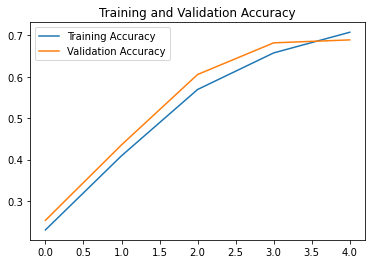

In [12]:
# 可视化 acc 曲线
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

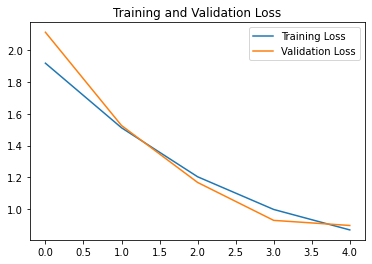

In [13]:
# 可视化 loss 曲线
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()